In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#reading the data
facebook = pd.read_csv("facebook_data.csv")
twitter = pd.read_csv("twitter_data.csv")
instagram = pd.read_csv("instagram_data.csv")
linkedin = pd.read_csv("linkedin_data.csv")
merged_data = pd.read_csv("merged_data.csv")

In [4]:
#glimpse of the data
merged_data.head()

,Network,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Non-fan Impressions,...,Post Link Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,Follows from Post,Unfollows from Post,Media Views,Saves
0,Twitter,Text,,Welcome @VusiThembekwayo to the session. Tell ...,2510,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,24.0,7.0,1.0,1.0,0.0,0.0,NaN
1,Twitter,Text,,Our guest today is @VusiThembekwayo the younge...,789,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,NaN
2,Twitter,Text,,Welcome everyone to another #MovingForwardNG s...,791,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
3,Twitter,Text,,1 hour to the #MovingForwardNG conversation wi...,2397,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,11.0,3.0,0.0,0.0,0.0,0.0,NaN
4,Twitter,Text,,Join the #MovingForwardNG conversation from 4p...,1008,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
#checking data types
merged_data.dtypes

Network                              object
Content Type                         object
Sent by                              object
Post                                 object
Impressions                           int64
Organic Impressions                 float64
Viral Impressions                   float64
Non-viral Impressions               float64
Fan Impressions                     float64
Non-fan Impressions                 float64
Reach                               float64
Organic Reach                       float64
Viral Reach                         float64
Non-viral Reach                     float64
Fan Reach                           float64
Engagement Rate (per Impression)     object
Engagement Rate (per Reach)          object
Engagements                           int64
Reactions                             int64
Likes                                 int64
Love Reactions                      float64
Haha Reactions                      float64
Wow Reactions                   

In [6]:
#checking data for missig values
merged_data.isnull().sum()

Network                                 0
Content Type                            0
Sent by                                 0
Post                                    0
Impressions                             0
Organic Impressions                 14074
Viral Impressions                   22257
Non-viral Impressions               22257
Fan Impressions                     22257
Non-fan Impressions                 22257
Reach                               14074
Organic Reach                       14074
Viral Reach                         22257
Non-viral Reach                     22257
Fan Reach                           22257
Engagement Rate (per Impression)       23
Engagement Rate (per Reach)         15013
Engagements                             0
Reactions                               0
Likes                                   0
Love Reactions                      22257
Haha Reactions                      22257
Wow Reactions                       22257
Sad Reactions                     

In [7]:
#fill NaN values with 0
merged_data = merged_data.fillna(0)

Analayzing Content Type vs Engagaments 

In [8]:
#Engagement statitics
merged_data['Engagements'].describe()

count    29855.000000
mean       128.128488
std        534.449196
min        -23.000000
25%         28.000000
50%         59.000000
75%        115.000000
max      33395.000000
Name: Engagements, dtype: float64

It appears that some engagement data is exhibiting irregular fluctuations, including negative values, which are incorrect.

In [9]:
#fixing the negatives by making them absolute values
merged_data['Engagements'] = abs(merged_data['Engagements'])

In [10]:
#Engagement statitics
merged_data['Engagements'].describe()

count    29855.000000
mean       128.130363
std        534.448746
min          0.000000
25%         28.000000
50%         59.000000
75%        115.000000
max      33395.000000
Name: Engagements, dtype: float64

In [11]:
#Engagement mode
mode = merged_data['Engagements'].describe().mode().values[0]
print(f"The mode for enagagements is {mode}")

#number of posts with mode engagements 
mode_engagements = merged_data['Engagements'][merged_data['Engagements'] == mode]
print(f"{len(mode_engagements)} posts have {mode} engagements")

The mode for enagagements is 0.0
49 posts have 0.0 engagements


Most of the posts have atleast one engagement  now we analyze how these engagements vary for content type
and social media site

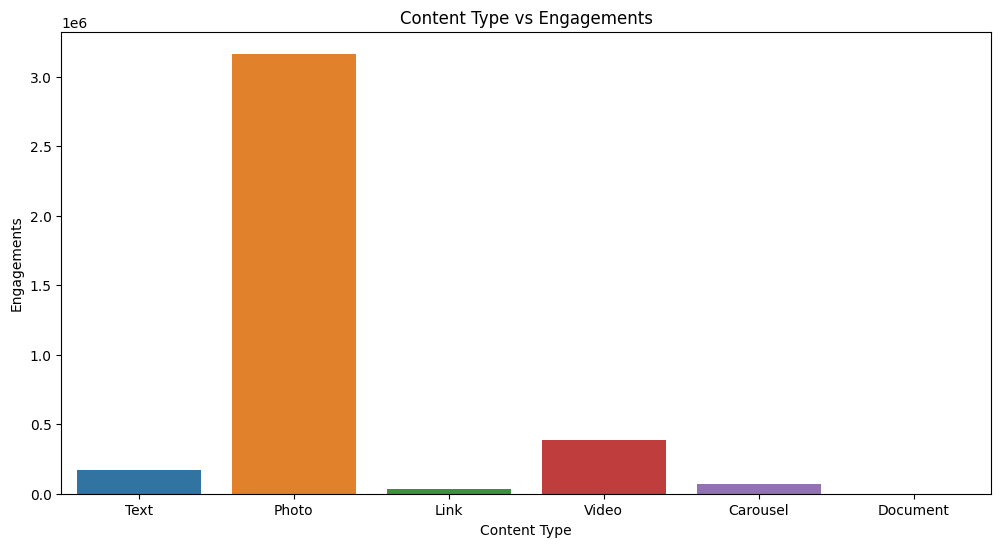

In [12]:
#plot a bar graph of content type vs engagements 
plt.figure(figsize = (12, 6))
sns.barplot(x='Content Type', y= 'Engagements', data=merged_data, estimator=sum, errorbar=None)
plt.title("Content Type vs Engagements")
plt.xlabel("Content Type")
plt.ylabel("Engagements")
plt.show()

Photos are the most engaging content type, followed by videos, text-based posts, carousels, and links. This ranking suggests that users on the social media platforms tend to interact more with visual content compared to other types of content like text and links.

Analyzing Content Type Engagements Across Various Social Media Platforms

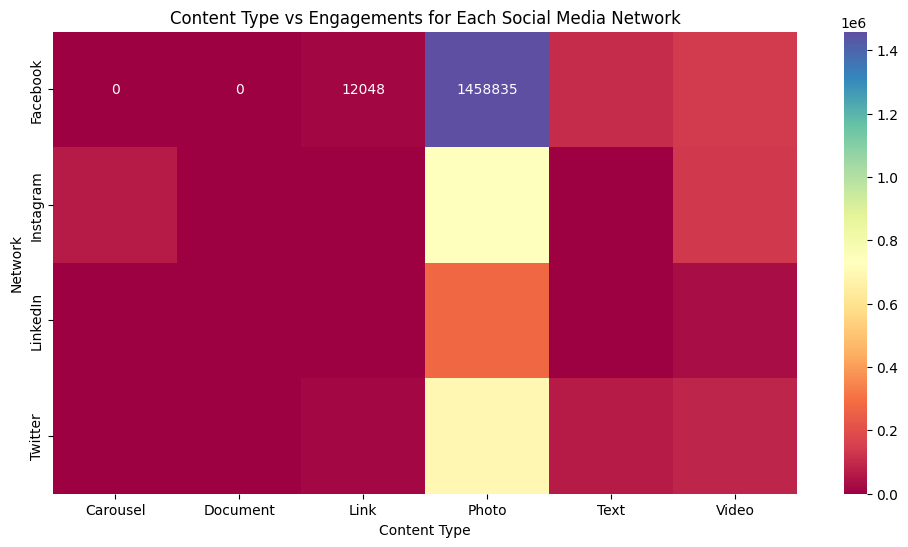

In [13]:
# Group by 'Network' and 'Content Type' and calculate the sum of 'Engagements'
grouped_data = merged_data.groupby(['Network', 'Content Type'])['Engagements'].sum().reset_index()

# Create a pivot table to see 'Content Type' vs 'Engagements' for each 'Network'
pivot_table = pd.pivot_table(grouped_data, values='Engagements', index='Network', columns='Content Type', fill_value=0)

# Convert the data to integers
pivot_table = pivot_table.astype(int)

# Plot the pivot table using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Spectral")
plt.title("Content Type vs Engagements for Each Social Media Network")
plt.xlabel("Content Type")
plt.ylabel("Network")
plt.show()


We'll design a function that analyzes metrics for all the networks over time

In [14]:
# Convert 'Date' to datetime format 
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%d/%m/%Y')


In [15]:

#this function will take a metric and compare its performance totals for all the networks across the years
def plot_metric_over_time(merged_data, metric):
    # List of unique network values
    networks = merged_data['Network'].unique()

    # Define a list of colors for the line plots
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'v']

    plt.figure(figsize=(12, 4))
    for i, network in enumerate(networks):
        network_data = merged_data[merged_data['Network'] == network]
        total_metrics = network_data.set_index('Date').groupby(pd.Grouper(freq='Y'))[metric].sum()
        plt.plot(total_metrics.index, total_metrics.values, linestyle='-', color=colors[i], label=network)

    # Set plot labels and title for the specified metric
    plt.title(f'{metric} Over Time by Network')
    plt.xlabel('Date')
    plt.ylabel(metric)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the legend
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

Engagement types for each network over the years

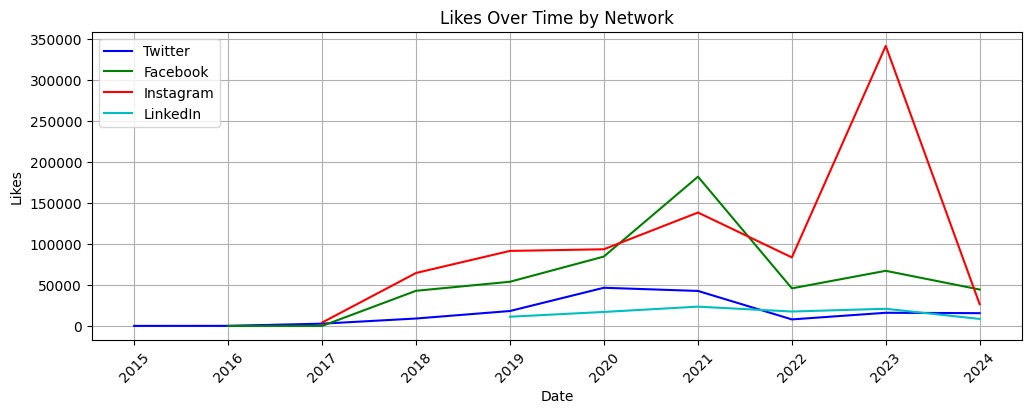

In [16]:
#likes over time
plot_metric_over_time(merged_data, 'Likes')

**Facebook:** The platform exhibits a consistent growth in likes starting in 2017. A notable surge in 2020 indicates substantial engagement, but this peak is succeeded by a rapid decline in 2021. While there is a mild in 2022, a subsequent dip is observed in 2023.

**Twitter:** Twitter also demonstrates a steady increase in likes from 2017, with a slight uptick between 2019 and 2020. However, this upswing is swiftly followed by a steep decline in 2021. Notably, there is a gradual resurgence in likes starting from 2022.

**Instagram:** Instagram's data reflects a significant growth rate commencing in 2019, culminating in a peak during 2021. Yet, analogous to other platforms, there's a dip in likes in 2021. While there's a lessening of this decline from 2022 to 2023, it regresses once more in 2023.

**LinkedIn:** LinkedIn's data portrays an increase in likes from 2019 to 2020, accompanied by a minor dip swiftly followed by a recovery. However, in 2023, the data reveals an escalated rate of decline.

These insights illustrate the dynamic nature of user engagement across various social media networks and higlight the effect on the Covid 19 pandemic on user engagement

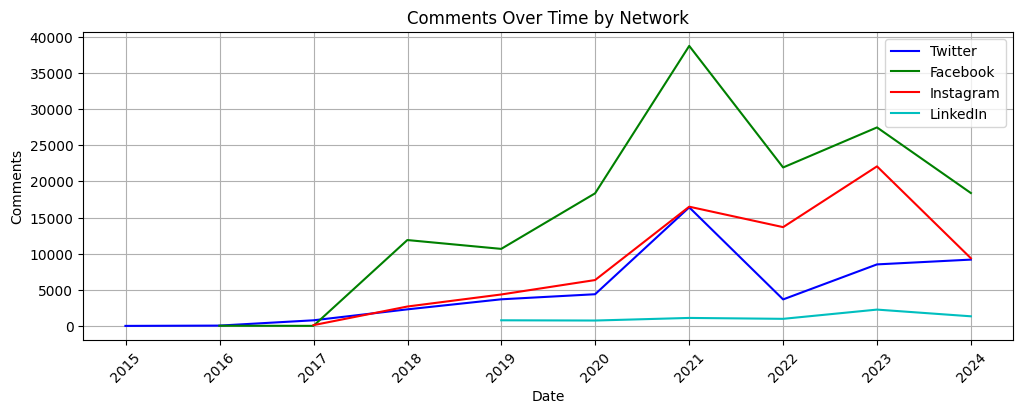

In [17]:
#comments over time by network
plot_metric_over_time(merged_data, 'Comments')

Comments for the different networks appear to exhibit similar trends as the "Likes" data, albeit with lower engagement numbers.

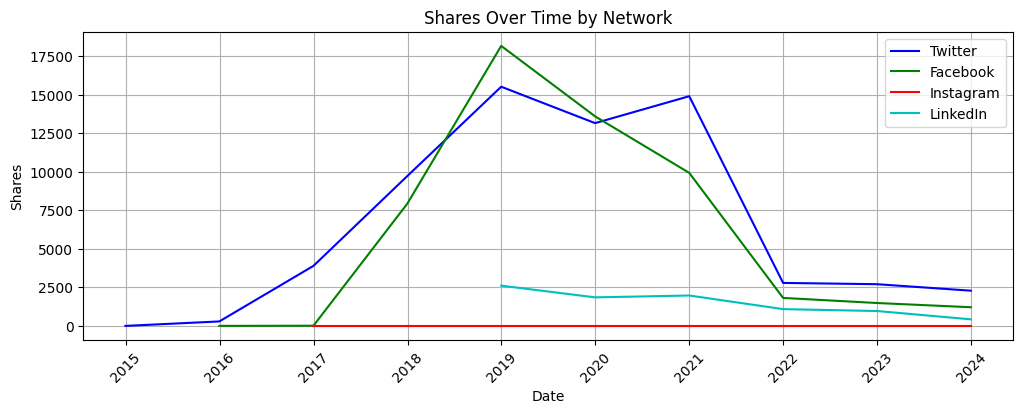

In [18]:
#shares over time by network
plot_metric_over_time(merged_data, 'Shares')

Shares on Facebook exhibited rapid growth between 2017 and 2018, followed by a sustained decline.

Shares on Twitter experienced significant growth from 2016 until 2819, followed by a temporary decline. A brief recovery occurrein n 2022, but it was short-lived, and shares decreased again. The decline then continued at a slower pace.

Shares on LinkedIn displayed a fluctuating trend with periods of steady declines and minor recoveries between 2019 and220Infter 2023, the data suggests a prolonged decline.

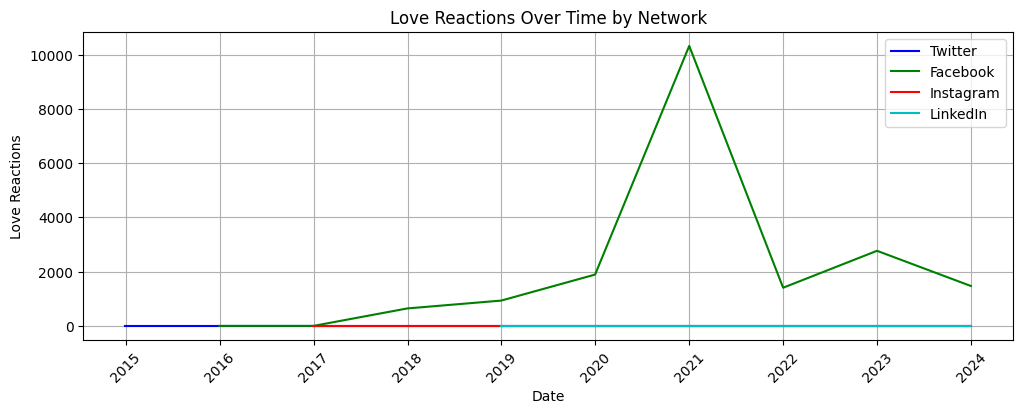

In [19]:
#love reactions over time by network
#NOTE: This metric is only available on facebook
plot_metric_over_time(merged_data, 'Love Reactions')

Love reactions  for Facbook appear to exhibit similar trends as the Facebook ikes" data, albeit with lower engagement numbers.

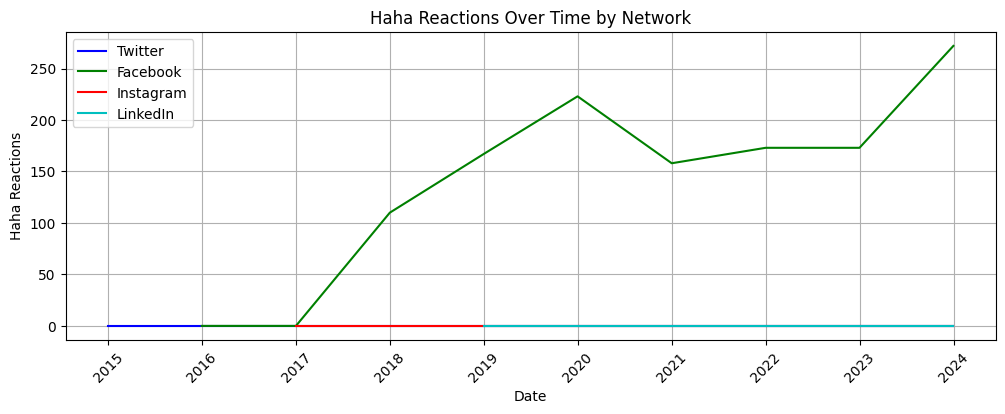

In [20]:
#Haha reactions over time by network
#NOTE: This metric is only available on facebook
plot_metric_over_time(merged_data, 'Haha Reactions')

Haha reactions on Facebook demonstrate consistent growth from 2017 to 2019. However, there was a decline in 2020. Subsequently, the data suggests a resurgence in Haha reactions.

In [ ]:
#Wow reactions over time by network
#NOTE: This metric is only available on facebook
plot_metric_over_time(merged_data, 'Wow Reactions')

Wow reactions showed growth in 2017, followed by a dip in 2018. There was a recovery between 2019 and 2020, but a decline in 2021 was followed by a rapid increase that declined just as swiftly.

In [ ]:
#Angry reactions over time by network
#Note : This data is only available for Facebook
plot_metric_over_time(merged_data, 'Angry Reactions')

Angry reactions demonstrate a slow and gradual growth trend from 2017 until they experience a significant boost in 2020. Subsequently, there is a decline in 2021, but a sharp increase is observed in 2022. However, the data does indicate a downward trend in 2023.

Analyzing Engagement rate vs Total Impressions

In [ ]:
# Remove the percentage sign from 'Engagement Rate (per Impression)' and 'Engagement Rate (per Reach)'
merged_data['Engagement Rate (per Impression)'] = merged_data['Engagement Rate (per Impression)'].str.rstrip('%').astype(float) 
merged_data['Engagement Rate (per Reach)'] = merged_data['Engagement Rate (per Reach)'].str.rstrip('%').astype(float)

In [ ]:
# Create box plots to identify outliers in the engagement rates data
plt.figure(figsize=(12, 6))

# Box plot for Engagement Rate (per Impression)
plt.subplot(1, 2, 1)
sns.boxplot(y='Engagement Rate (per Impression)', data=merged_data)
plt.title("Engagement Rate (per Impression) - Box Plot")

# Box plot for Engagement Rate (per Reach)
plt.subplot(1, 2, 2)
sns.boxplot(y='Engagement Rate (per Reach)', data=merged_data)
plt.title("Engagement Rate (per Reach) - Box Plot")

plt.tight_layout()
plt.show()

In [ ]:
# Create a violin plot for a more detailed view
plt.figure(figsize=(12, 6))

# Violin plot for Engagement Rate (per Impression)
plt.subplot(1, 2, 1)
sns.violinplot(y='Engagement Rate (per Impression)', data=merged_data)
plt.title("Engagement Rate (per Impression) - Violin Plot")

# Violin plot for Engagement Rate (per Reach)
plt.subplot(1, 2, 2)
sns.violinplot(y='Engagement Rate (per Reach)', data=merged_data)
plt.title("Engagement Rate (per Reach) - Violin Plot")

plt.tight_layout()
plt.show()


It appears that there are some data points with outlier engagement rates, possibly due to incorrect reach and impression values. These outliers, including extreme percentages like 3795.0%, will be removed from the dataset as they can distort the analysis and do not reflect typical engagement patterns.

In [ ]:
#fill any NaN values with 0
merged_data = merged_data.fillna(0)

In [ ]:
# Filter out rows where 'Engagement Rate (per Impression)' is greater than 100.0%
merged_data = merged_data[merged_data['Engagement Rate (per Impression)'] <= 100.0]

# Filter out rows where 'Engagement Rate (per Reach)' is greater than 100.0%
merged_data = merged_data[merged_data['Engagement Rate (per Reach)'] <= 100.0]


In [ ]:
# Create box plots to identify any outliers left in the engagement rates data
plt.figure(figsize=(12, 6))

# Box plot for Engagement Rate (per Impression)
plt.subplot(1, 2, 1)
sns.boxplot(y='Engagement Rate (per Impression)', data=merged_data)
plt.title("Engagement Rate (per Impression) - Box Plot")

# Box plot for Engagement Rate (per Reach)
plt.subplot(1, 2, 2)
sns.boxplot(y='Engagement Rate (per Reach)', data=merged_data)
plt.title("Engagement Rate (per Reach) - Box Plot")

plt.tight_layout()
plt.show()

In [ ]:
# Create a violin plot for a more detailed view
plt.figure(figsize=(12, 6))

# Violin plot for Engagement Rate (per Impression)
plt.subplot(1, 2, 1)
sns.violinplot(y='Engagement Rate (per Impression)', data=merged_data)
plt.title("Engagement Rate (per Impression) - Violin Plot")

# Violin plot for Engagement Rate (per Reach)
plt.subplot(1, 2, 2)
sns.violinplot(y='Engagement Rate (per Reach)', data=merged_data)
plt.title("Engagement Rate (per Reach) - Violin Plot")

plt.tight_layout()
plt.show()


While outliers persist in the data, they are more likely to enhance our analysis rather than distort it.

In [ ]:
#descriptive statistics for enagegement rates
print(merged_data['Engagement Rate (per Impression)'].describe())
print(merged_data['Engagement Rate (per Reach)'].describe())

In [ ]:
#correcting the negative engagement rates and reviewing the statistics again
merged_data['Engagement Rate (per Impression)'] = abs(merged_data['Engagement Rate (per Impression)'])
print(merged_data['Engagement Rate (per Impression)'].describe())
print(merged_data['Engagement Rate (per Reach)'].describe())

In [ ]:
#mode for engagement rates
mode_impression = merged_data['Engagement Rate (per Impression)'].describe().mode().values[0]
print(f"The mode for Engagement Rate (per Impression) is: {mode_impression}") 

mode_reach = merged_data['Engagement Rate (per Reach)'].describe().mode().values[0]
print(f"The mode for Engagement Rate (per Reach) is: {mode_reach}") 


In [ ]:
# Count the number of posts with mode engagements
num_posts_with_mode_impression = (merged_data['Engagement Rate (per Impression)'] == mode_impression).sum()
num_posts_with_mode_reach = (merged_data['Engagement Rate (per Reach)'] == mode_reach).sum()

print(f"{num_posts_with_mode_impression} posts have {mode_impression} engagement rate (per Impression)")
print(f"{num_posts_with_mode_reach} posts have {mode_reach} engagement rate (per Reach)")

NB. Many posts have zero engagement rates per reach because the provided datasets for LinkedIn and Twitter do not have a reach metric or its equivalent

In [ ]:

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Scatter plot for Engagement Rate vs Impressions
plt.subplot(1, 2, 1)
sns.scatterplot(x='Engagement Rate (per Impression)', y='Impressions', data=merged_data, alpha=0.5)
plt.title("Engagement Rate vs Impressions")
plt.xlabel("Engagement Rate (per Impression)%")
plt.ylabel("Impressions")

# Scatter plot for Engagement Rate vs Reach
plt.subplot(1, 2, 2)
sns.scatterplot(x='Engagement Rate (per Reach)', y='Reach', data=merged_data, alpha=0.5)
plt.title("Engagement Rate vs Reach")
plt.xlabel("Engagement Rate (per Reach)% Facebook & Instagram only")
plt.ylabel("Reach")

plt.tight_layout()
plt.show()


The majority of the rates seem to lie between 0 and 20 so we'll make a plot zooming into the points on the scale

In [ ]:

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Scatter plot for Engagement Rate vs Impressions
plt.subplot(1, 2, 1)
sns.scatterplot(x='Engagement Rate (per Impression)', y='Impressions', data=merged_data, alpha=0.5)
plt.title("Engagement Rate vs Impressions")
plt.xlabel("Engagement Rate (per Impression)")
plt.ylabel("Impressions")

# Set the x-axis limits to focus on the range of interest
plt.xlim(0, 20) 

# Scatter plot for Engagement Rate vs Reach
plt.subplot(1, 2, 2)
sns.scatterplot(x='Engagement Rate (per Reach)', y='Reach', data=merged_data, alpha=0.5)
plt.title("Engagement Rate vs Reach")
plt.xlabel("Engagement Rate (per Reach) Facebook & Instagram only")
plt.ylabel("Reach")

# Set the x-axis limits to focus on the range of interest
plt.xlim(0, 20)  

plt.tight_layout()
plt.show()


The engagement rates predominantly fall within the range of 1.0% to 7.5%, which is widely recognized as a favorable and healthy rate for social media interactions.

In [ ]:

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the networks you want to plot
networks = ['Facebook', 'Twitter', 'Instagram', 'LinkedIn']

# Iterate over the networks and create subplots
for i, network in enumerate(networks):
    # Filter data for the current network
    network_data = merged_data[merged_data['Network'] == network]

    # Create a subplot in the i-th position
    ax = axes[i // 2, i % 2]

    # Create a scatter plot for Engagement Rate (per Impression) for the current network
    ax.scatter(network_data['Engagement Rate (per Impression)'], network_data['Impressions'], alpha=0.5)
    ax.set_title(f'{network} - Engagement Rate vs Impressions')
    ax.set_xlabel('Engagement Rate (per Impression)')
    ax.set_ylabel('Impressions')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


zooming in rates between zero and 20

In [ ]:

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the networks you want to plot
networks = ['Facebook', 'Twitter', 'Instagram', 'LinkedIn']

# Set the x-axis limits
x_axis_limits = [(0, 20), (0, 20), (0, 20), (0, 20)] 

# Iterate over the networks and create subplots
for i, network in enumerate(networks):
    # Filter data for the current network
    network_data = merged_data[merged_data['Network'] == network]

    # Create a subplot in the i-th position
    ax = axes[i // 2, i % 2]

    # Create a scatter plot for Engagement Rate (per Impression) for the current network
    ax.scatter(network_data['Engagement Rate (per Impression)'], network_data['Impressions'], alpha=0.5)
    ax.set_title(f'{network} - Engagement Rate vs Impressions')
    ax.set_xlabel('Engagement Rate (per Impression)')
    ax.set_ylabel('Impressions')
    
    # Set the x-axis limits
    ax.set_xlim(x_axis_limits[i])


# Adjust the layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


LinkedIn's Strong Engagement Rates: Despite having fewer impressions, LinkedIn stands out with a higher concentration
of engagement rates above 5%, indicating a more engaged audience on the platform.
    
Instagram's Predominantly High Engagement Rates: Instagram shows a consistent pattern of high engagement rates, with the
majority exceeding 1%. This suggests that Instagram users are generally more engaged with the content they encounter.

Facebook's High Impressions and Balanced Engagement Rates: Facebook boasts the highest number of impressions and a well
balanced composition of engagement rates, primarily falling between 1% and 7%. This engagement rate distribution
may contribute to its broad appeal.

Twitter's Strong Engagement for Low Impressions: Twitter's engagement rates are notably strong for posts with impressions
under 10,000, and the rates predominantly range from 1% to 7%. 
This suggests that Twitter excels in engaging smaller but highly interactive audiences.

Overall, there is a positive correlation between engagement rates and impressions on these social media platforms, meaning that higher impressions often lead to higher engagement rates. However, the strength of this correlation varies among the platforms, with some showing stronger correlations than others.

Analyzing Impressions over time periods

In [ ]:
merged_data['Date']

In [ ]:
# Convert 'Date' to datetime format 
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%d/%m/%Y')

# Group the data by year and calculate the sum of impressions for each year
impressions_over_years = merged_data.set_index('Date').groupby(pd.Grouper(freq='Y'))['Impressions'].sum()

# Create a time series plot as a line graph
plt.figure(figsize=(12, 4))
plt.plot(impressions_over_years.index, impressions_over_years.values, linestyle='-', color='b')
plt.title('Impressions Over the Years')
plt.xlabel('Year')
plt.ylabel('Impressions')
plt.grid(True)

plt.show()


Plot charts for impressions over quarters, months and weekdays

In [ ]:

import matplotlib.dates as mdates

# Group the data by month and calculate the sum of impressions for each month across years
impressions_over_months = merged_data.groupby([merged_data['Date'].dt.year, merged_data['Date'].dt.month])['Impressions'].sum()

# Group the data by quarter and calculate the sum of impressions for each quarter in each year
impressions_over_quarters = merged_data.groupby([merged_data['Date'].dt.year, merged_data['Date'].dt.quarter])['Impressions'].sum()

# Group the data by weekdays and calculate the sum of impressions for each weekday in each year
impressions_over_weekdays = merged_data.groupby([merged_data['Date'].dt.year, merged_data['Date'].dt.weekday])['Impressions'].sum()

# Create a time series plot for impressions over months
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
impressions_over_months.unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Impressions Over Months Across Years')
plt.xlabel('Month')
plt.ylabel('Impressions')
plt.grid(True)

# Create a time series plot for impressions over quarters
plt.subplot(2, 2, 2)
impressions_over_quarters.unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Impressions Over Quarters in Each Year')
plt.xlabel('Quarter')
plt.ylabel('Impressions')
plt.grid(True)

# Create a time series plot for impressions over weekdays
plt.subplot(2, 2, 3)
impressions_over_weekdays.unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Impressions Over Weekdays in Each Year')
plt.xlabel('Weekday')
plt.ylabel('Impressions')
plt.grid(True)

# Adjust the layout for better spacing
plt.tight_layout()

plt.show()


The data indicates that in the earlier years, particularly before 2020, there was a consistent trend of higher impressions during the 3rd and 4th quarters. However, starting in 2020, a noticeable shift occurred, likely due to the COVID-19 pandemic, with a significant increase in online activity. This shift is most evident in the months of March and April, which consistently saw the highest impressions over the years. This suggests that the pandemic had a substantial impact on online behavior, leading to increased impressions during these months.

To gain a better understanding of the data and its implications, a more comprehensive analysis of the pre-COVID and post-COVID performance would be beneficial. Such an analysis could help determine whether the trends in impressions are likely to return to their pre-pandemic patterns or if they have been permanently altered.

Additionally, the data reveals that midweek days, specifically Wednesday, Thursday, and Friday, consistently have the highest number of impressions compared to other weekdays. This trend appears to be less affected by the pandemic compared to other aspects of the data. It suggests that the midweek period remains a crucial time for online activity, even during extraordinary events such as the pandemic. Further analysis and investigation into this midweek trend could provide valuable insights into user behavior and preferences.


Analyzing Impressions and Time

In [ ]:
#resetting the index
merged_data.reset_index(inplace=True)
merged_data.head(1)

In [ ]:
merged_data['Time']

In [ ]:
# Convert the "Time" column to a datetime object
merged_data['Time'] = pd.to_datetime(merged_data['Time'], format='%H:%M:%S')

# Extract the hour component and format it in 12-hour format
merged_data['Hour'] = merged_data['Time'].dt.strftime('%I %p')

# Create a figure
plt.figure(figsize=(12, 6))

# Define the custom order for the "Hour" column
hour_order = [
    '12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM',
    '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM',
    '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM'
]

# Convert the "Hour" column to a categorical with custom order
merged_data['Hour'] = pd.Categorical(merged_data['Hour'], categories=hour_order, ordered=True)

# Group the data by hour and calculate the sum of impressions for each hour
hourly_impressions = merged_data.groupby('Hour')['Impressions'].sum()

# Create a time series plot as a line graph
plt.plot(hourly_impressions.index, hourly_impressions.values, linestyle='-', marker='o')
plt.title("Hour of Day vs Impressions")
plt.xlabel("Hour of Day")
plt.ylabel("Impressions")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.show()


Posts made at 10 am consistently received the highest impressions, closely followed by posts made at 5 pm and noon (12 pm). During the night time, 9 pm stood out as the most favorable hour for impressions. Conversely, posts shared between 11 pm and 6 am consistently yielded the lowest impressions. This pattern suggests that posting during specific daytime hours is more likely to generate higher impressions compared to late-night and early morning posting.

Analyzing Engagements and Time

In [ ]:
# Convert the "Time" column to a datetime object
merged_data['Time'] = pd.to_datetime(merged_data['Time'], format='%H:%M:%S')

# Extract the hour component and format it in 12-hour format
merged_data['Hour'] = merged_data['Time'].dt.strftime('%I %p')

# Create a figure
plt.figure(figsize=(12, 6))

# Define the custom order for the "Hour" column
hour_order = [
    '12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM',
    '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM',
    '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM'
]

# Convert the "Hour" column to a categorical with custom order
merged_data['Hour'] = pd.Categorical(merged_data['Hour'], categories=hour_order, ordered=True)

# Group the data by hour and calculate the sum of Engagements for each hour
hourly_engagements = merged_data.groupby('Hour')['Engagements'].sum()

# Create a time series plot as a line graph
plt.plot(hourly_engagements.index, hourly_engagements.values, linestyle='-', marker='o')
plt.title("Hour of Day vs Engagements")
plt.xlabel("Hour of Day")
plt.ylabel("Engagements")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.show()


The engagement metrics closely align with the trends observed in impressions, with some minor variations, particularly during the afternoon hours.

Checking individual network peak impression times

In [ ]:
# List of unique network values
networks = merged_data['Network'].unique()

# Create a figure
plt.figure(figsize=(12, 6))

# Define the custom order for the "Hour" column
hour_order = [
    '12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM',
    '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM',
    '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM'
]

# Convert the "Hour" column to a categorical with custom order
merged_data['Hour'] = pd.Categorical(merged_data['Hour'], categories=hour_order, ordered=True)

# Iterate through each network and plot the data
for network in networks:
    network_data = merged_data[merged_data['Network'] == network]
    hourly_impressions = network_data.groupby('Hour')['Impressions'].sum()
    
    # Create a time series plot as a line graph for each network
    plt.plot(hourly_impressions.index, hourly_impressions.values, linestyle='-', marker='o', label=network)

# Set plot labels and title
plt.title("Hour of Day vs Impressions by Network")
plt.xlabel("Hour of Day")
plt.ylabel("Impressions")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


The impression patterns for each individual network largely align with the general pattern established earlier, with some nuanced variations in specific cases.

Checking individual network peak engagement times

In [ ]:
# List of unique network values
networks = merged_data['Network'].unique()

# Create a figure
plt.figure(figsize=(12, 6))

# Define the custom order for the "Hour" column
hour_order = [
    '12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM',
    '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM',
    '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM'
]

# Convert the "Hour" column to a categorical with custom order
merged_data['Hour'] = pd.Categorical(merged_data['Hour'], categories=hour_order, ordered=True)

# Iterate through each network and plot the data
for network in networks:
    network_data = merged_data[merged_data['Network'] == network]
    hourly_engagements = network_data.groupby('Hour')['Engagements'].sum()
    
    # Create a time series plot as a line graph for each network
    plt.plot(hourly_engagements.index, hourly_engagements.values, linestyle='-', marker='o', label=network)

# Set plot labels and title
plt.title("Hour of Day vs Engagements by Network")
plt.xlabel("Hour of Day")
plt.ylabel("Engagements")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


The trends in engagements for individual networks appear to follow the broader patterns identified earlier, with minor variations specific to each network's behavior.

Analyzing clicks made on posts

In [ ]:
#plotting a chart to show clicks over the years
# Group the data by year and calculate the sum of clicks for each year
clicks_over_years = merged_data.set_index('Date').groupby(pd.Grouper(freq='Y'))['Post Clicks (All)'].sum()

# Create a time series plot as a line graph
plt.figure(figsize=(12, 4))
plt.plot(clicks_over_years.index, clicks_over_years.values, linestyle='-', color='b')
plt.title('Clicks Over the Years')
plt.xlabel('Year')
plt.ylabel('Clicks')
plt.grid(True)

plt.show()


The data indicates a gradual increase in the number of post clicks over the years, with a noticeable acceleration in the growth rate between 2019 and 2020, which coincides with the peak of the COVID-19 pandemic. However, this rapid increase is followed by an equally swift decline. In 2022, there appears to be a modest recovery in the number of post clicks but its being offset in 2023

Let us analyze the independent network clicks

In [ ]:
# List of unique network values
networks = merged_data['Network'].unique()

# Create a figure
plt.figure(figsize=(12, 6))

for network in networks:
    network_data = merged_data[merged_data['Network'] == network]
    
    # Group the data by year and calculate the sum of clicks for each year
    clicks_per_network = network_data.set_index('Date').groupby(pd.Grouper(freq='Y'))['Post Clicks (All)'].sum()

    # Create a time series plot as a line graph for each network
    plt.plot(clicks_per_network.index.year, clicks_per_network.values, linestyle='-', marker='o', label=network)

# Set plot labels and title
plt.title('Clicks Over the Years by Network')
plt.xlabel('Year')
plt.ylabel('Clicks')
plt.legend()
plt.grid(True)

plt.show()


The Instagram data at hand, unfortunately, does not provide insights into post clicks, making it challenging to analyze patterns for this network. However, we can draw meaningful observations for the other three networks:

1. **Facebook:**
   - Facebook consistently leads with the highest number of post clicks.
   - There was a gradual increase in post clicks over the years, with a notable surge between 2018 an192020.
   - This surge was primarily during the peak of the COVID-19 pandemic, where online activity saw a significant uptick.
   - However, there was a sharp dein 2020d 2021 as the pandemic subsided.
   - The data suggests a gradual recovery in post clicks from 2021 onwards.

2. **Twitter:**
   - Twitter's post click trends align with those of Facebook, but with some variations.
   - Similar to Facebook, there was a gradual increase in post clicks over the years, driven by pandemic-related online activity.
   - However, unlike Facebook, Twitter has not shown a clear recovery in post clicks after the 2020 decline. The rate of decline appears slower.

3. **LinkedIn:**
   - LinkedIn's data is distinct, with records available from 2018.
   - Interestingly, while other networks experienced a surge in post clicks during the pandemic, LinkedIn saw a decrease.
   - Post-pandemic, LinkedIn's post clicks started increasing at a better rate than during the pandemic.
   - However, from 2022 onwards, there is a steady decline in post clicks as the data approaches 2023.

These observations highlight how different social networks responded to the dynamic environment influenced by the COVID-19 pandemic and the subsequent shifts in user engagement and online activity. The recovery or decline in post clicks reflects the evolving user behavior on these platforms.

We'll proceed to analyze the types of clicks made

In [ ]:
#Post link clicks over time
#The data is only available for Twitter and LinkedIn
plot_metric_over_time(merged_data, 'Post Link Clicks')

Post link clicks on Twitter showed gradual growth which is bossted in 2020. It is followed by a decline in 2021, returning to pre-2020 levels.
LinkedIn lacks data for most of the other click metrics except for post link clicks. Starting in 2019, there was an increase, but a decline occurred in 2020. A slow increase took place in 2021 which was then significantly boosted in 2022 but 2023 shows a fast decline.

In [ ]:
#Post Media clicks over time
#The data is only available for Twitter
plot_metric_over_time(merged_data, 'Post Media Clicks')

Twitter Post media clicks demonstrated steady growth over the years, with a significant boost during the peak of the COVID-19 pandemic in 2020 followed by a decline in 2021 that while slowing down in 2022, continues.

In [ ]:
#Post Hashtag clicks over time
#The data is only available for Twitter
plot_metric_over_time(merged_data, 'Post Hashtag Clicks')

Twitter's post hashtag clicks experienced gradual growth until 2018, followed by a dip, but a strong recovery in 2020. A decline followed in 2021 but from 2022, a strong recovery seems to be taking place."

In [ ]:
#Post Detail Expand Clicks clicks over time
#The data is only available for Twitter
plot_metric_over_time(merged_data, 'Post Detail Expand Clicks')

Twitter Post Detail Expand clicks demonstrated steady growth over the years, with a significant boost during the peak of the COVID-19 pandemic in 2020 followed by a decline in 2021 that while slows down in 2022 and generally plateaus.

In [ ]:
#Profile Clicks clicks over time
#The data is only available for Twitter
plot_metric_over_time(merged_data, 'Profile Clicks')

Twitter Profile clicks demonstrated steady growth over the years, with a significant boost during the peak of the COVID-19 pandemic in 2020, followed by a decline in 2022. There is an uptake in 2022 but that appears to be reversing in 2023

In [ ]:
#Post Photot View Clicks over time
#The data is only available for Facebook
plot_metric_over_time(merged_data, 'Post Photo View Clicks')

Facebook is the only network with photo view click data, showing steady growth until 2020. Subsequently, there was a significant decline; however, the data suggests a gradual recovery might be underway."

In [ ]:
#Other Post Clicks Expand Clicks clicks over time
#The data is only available for Twitter and Facebook
plot_metric_over_time(merged_data, 'Other Post Clicks')

Other post link clicks on Facebook saw a substantial increase between 2019 and 2020, followed by a decline in 2021 to levels similar to those before the increase.The data suggests a gradual recovery might be underway.
Twitter's other post link clicks increase gradually from 2017 with aa significant boost between 2019 and 2020. This is followed by a decline in 2021 that seems to be slowing down.

I will exclude unique post clicks data from the plots since it pertains exclusively to Twitter and the trends have already been discussed in the preceding analysis.